#### pyBlockSeis - Block Choice Seismic Analysis in Python

1. Input data: time series
2. Input parameters (Parameter object)
3. Functions
  - compute continuous wavelet transform (CWT)
  - apply a block bandpass
  - calculate noise model and threshold function
  - apply SNR detection method
  - apply hard thresholding to the noise (noise removal)
  - apply soft thresholding to the noise (noise removal)
  - apply hard thresholding to the signal (signal removal)
  - apply soft thresholding to the signal (signal removal)
  - compute the inverse CWT
  
Planned updates:
1. Computation in parallel (e.g. https://deepgraph.readthedocs.io/en/latest/tutorials/pairwise_correlations.html)

### Acknowledgements
- Python adpation of the Matlab software Block Choice Seismic Analysis (BCseis, version 1.1) by Charles A. Langston and S. Mostafa Mousavi.
- Forward and inverse CWTs functions based on the Synchrosqueezing Toolbox V1.21 by Eugene Brevdo and Gaurav Thakur.  (https://github.com/ebrevdo/synchrosqueezing).

In [1]:
import sys
sys.path.append("src")

import pyblockseis as bcs
from obspy.core import read
import matplotlib.pyplot as plt

import timeit

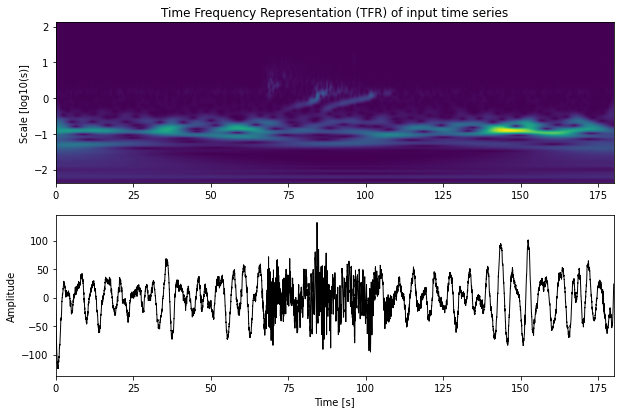

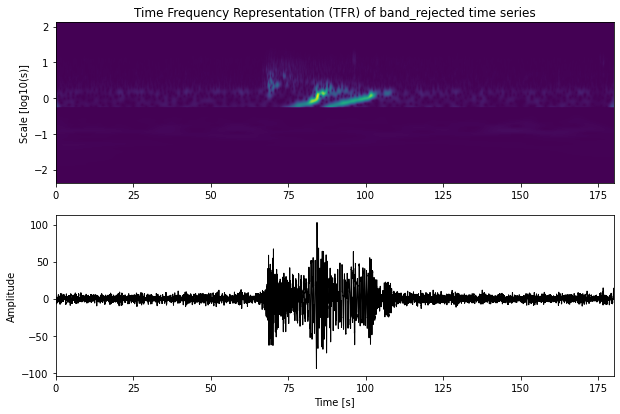

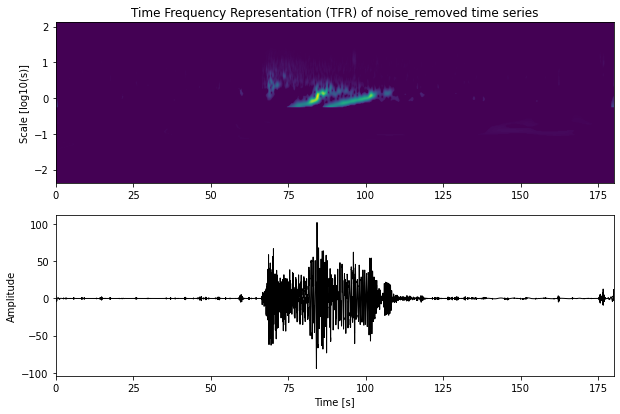

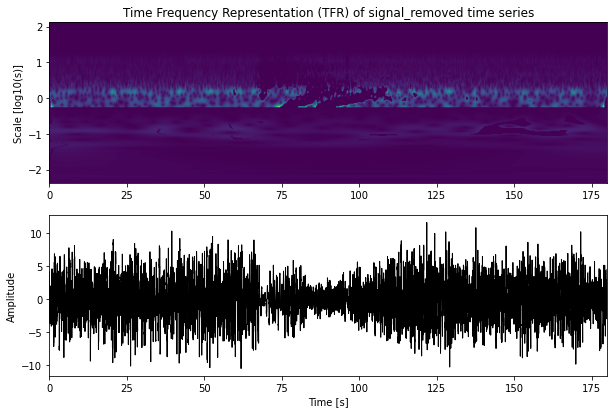

Run took -0.0041 seconds


In [3]:
# Read example data from BCseis
sacfile = "/Users/chiang4/Work/NNSA/LYNM/denoiser/bc_v1.1/data/5014.YW.0.sp0011.DPZ"
#sacfile = "/Users/chiang4/Work/NNSA/LYNM/denoiser/bc_v1.1/data/*DPZ" # multiple traces
st = read(sacfile)

start = timeit.timeit()
# Use the default values to process time series
# Refer to :class:pyblockseis.Parameter docstring for details
params = bcs.Parameter(block_threshold=1.0, noise_threshold="hard", signal_threshold="hard")

# Initalize the block processing module
block = bcs.Block(choice=params, data=st)

# Run the denoiser
block.run()
end = timeit.timeit()

# Plot results
block.plot("input")
block.plot("band_rejected")
block.plot("noise_removed")
block.plot("signal_removed")
print("Run took %.4f seconds"%(end - start))

In [4]:
block.data[0].wavelet

       scale: [  4.17709538e-03   4.36203120e-03   4.55515482e-03   4.75682875e-03
   4.96743155e-03   5.18735854e-03   5.41702252e-03   5.65685459e-03
   5.90730494e-03   6.16884368e-03   6.44196172e-03   6.72717173e-03
   7.02500907e-03   7.33603279e-03   7.66082671e-03   8.00000049e-03
   8.35419077e-03   8.72406239e-03   9.11030963e-03   9.51365750e-03
   9.93486310e-03   1.03747171e-02   1.08340450e-02   1.13137092e-02
   1.18146099e-02   1.23376874e-02   1.28839234e-02   1.34543435e-02
   1.40500181e-02   1.46720656e-02   1.53216534e-02   1.60000010e-02
   1.67083815e-02   1.74481248e-02   1.82206193e-02   1.90273150e-02
   1.98697262e-02   2.07494341e-02   2.16680901e-02   2.26274184e-02
   2.36292198e-02   2.46753747e-02   2.57678469e-02   2.69086869e-02
   2.81000363e-02   2.93441312e-02   3.06433069e-02   3.20000020e-02
   3.34167631e-02   3.48962496e-02   3.64412385e-02   3.80546300e-02
   3.97394524e-02   4.14988683e-02   4.33361801e-02   4.52548368e-02
   4.72584396e-02   

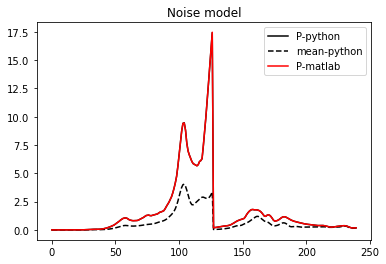

In [3]:
import numpy as np
plt.figure()
plt.title("Noise model")
plt.plot(block.data[0].wavelet.P,"k",label="P-python")
plt.plot(block.data[0].wavelet.M,"k--",label="mean-python")
matP = np.loadtxt("tmp/P.txt")
plt.plot(matP,"r",label="P-matlab")
plt.legend()

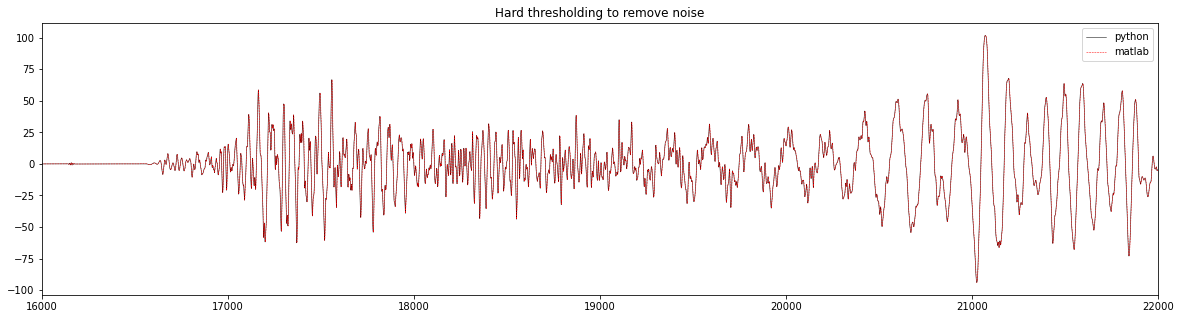

In [9]:
plt.figure(figsize=(20,5))
plt.title("Hard thresholding to remove noise")
plt.plot(block.data[0].wavelet.icwt["noise_removed"],"k",linewidth=0.5,label="python")
trace = read("tmp/icwtblock_noisehard.sac",format="SAC")[0]
plt.plot(trace.data,"r--",linewidth=0.5,label="matlab")
plt.xlim([16000,22000])
plt.legend()

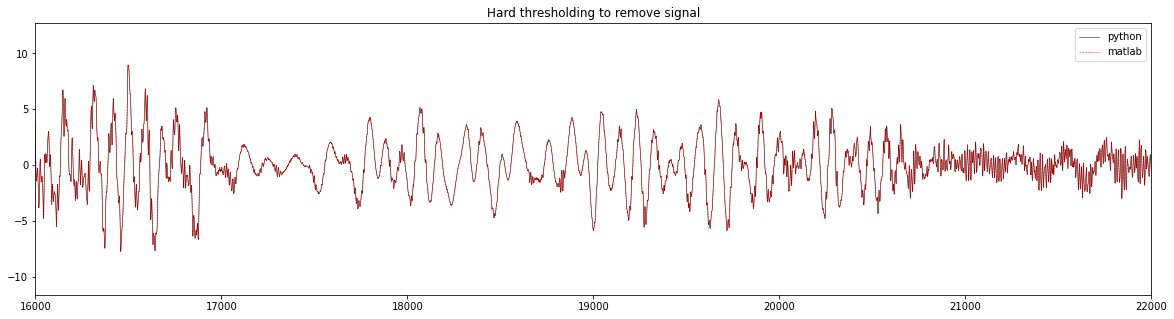

In [10]:
plt.figure(figsize=(20,5))
plt.title("Hard thresholding to remove signal")
plt.plot(block.data[0].wavelet.icwt["signal_removed"],"k",linewidth=0.5,label="python")
trace = read("tmp/icwtblock_signalhard.sac",format="SAC")[0]
plt.plot(trace.data,"r--",linewidth=0.5,label="matlab")
plt.xlim([16000,22000])
plt.legend()

In [13]:
block.params.noise_threshold="soft"
block.params.signal_threshold="soft"
block.run()

Apply new noise thresholding.
Apply new signal thresholding.


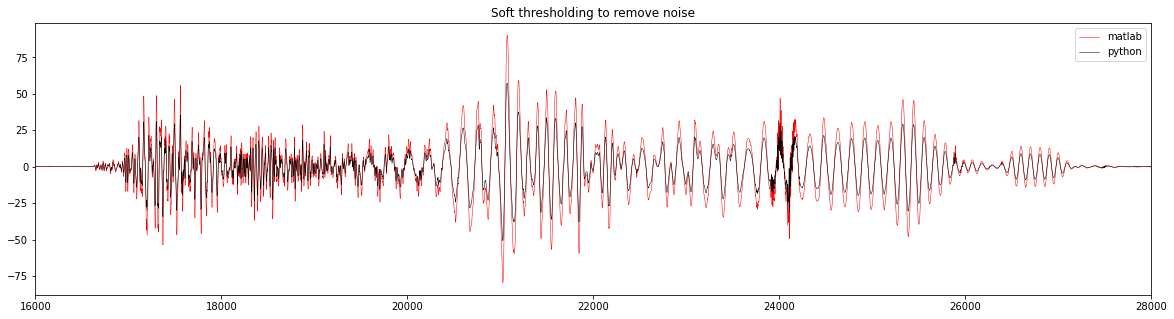

In [33]:
plt.figure(figsize=(20,5))
plt.title("Soft thresholding to remove noise")
trace = read("tmp/icwtblock_noisesoft.sac",format="SAC")[0]
plt.plot(trace.data,"r-",linewidth=0.5,label="matlab")
plt.plot(block.data[0].wavelet.icwt["noise_removed"],"k",linewidth=0.5,label="python")
plt.xlim([16000,28000])
plt.legend()

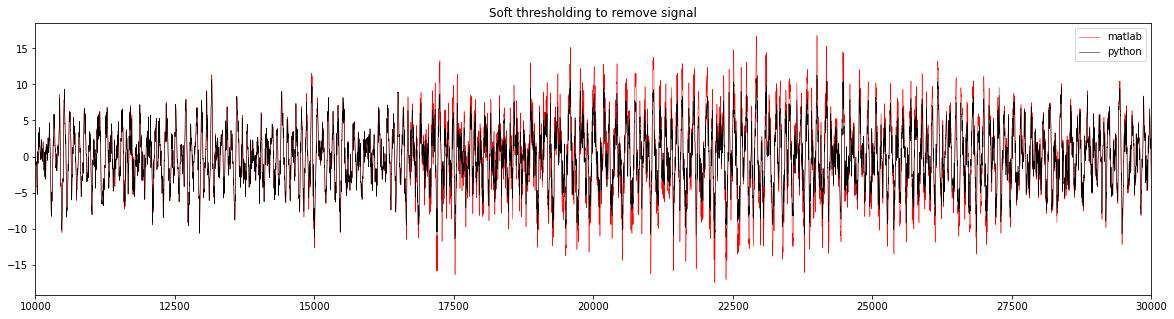

In [30]:
plt.figure(figsize=(20,5))
plt.title("Soft thresholding to remove signal")
trace = read("tmp/icwtblock_signalsoft.sac",format="SAC")[0]
plt.plot(trace.data,"r-",linewidth=0.5,label="matlab")
plt.plot(block.data[0].wavelet.icwt["signal_removed"],"k",linewidth=0.5,label="python")
plt.xlim([10000,30000])
plt.legend()

Apply new noise model.
Apply new noise thresholding.
Apply new signal thresholding.


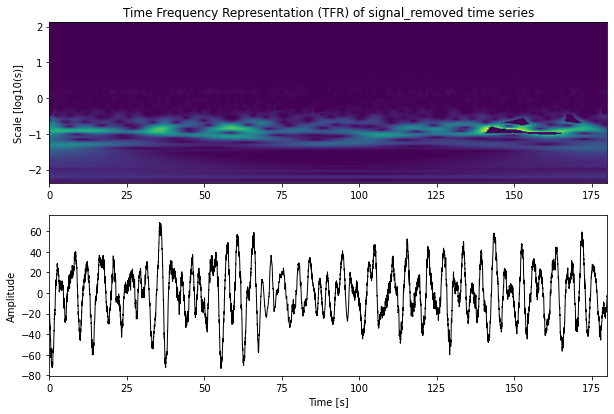

In [6]:
# Test update functions
block.params.nsigma_method = "donoho"
block.params.bandpass_blocking = False
block.params.estimate_noise = True
block.params.snr_detection = True
block.run()
block.plot("signal_removed")

In [7]:
# Test refresh functions
block.params.estimate_noise = False
block.run()
block.plot("signal_removed")

TypeError: No CWT on signal_removed time series.

In [54]:
tr = st[0]
tr_ref = tr.slice(starttime=tr.stats.starttime+1,endtime=tr.stats.starttime+200)
tr.data.shape
tr_ref.data.shape

(44751,)

In [60]:
params

        wave_type: morlet
          nvoices: 16
bandpass_blocking: True
        scale_min: 1.0
        scale_max: 200.0
  block_threshold: 1.0
   estimate_noise: True
  noise_starttime: 0.0
    noise_endtime: 60.0
  noise_threshold: hard
 signal_threshold: hard
    nsigma_method: ECDF
    snr_detection: False
   snr_lowerbound: 1.0
